# Import libraries 

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_df = pd.read_csv("concrete.csv")
data_df.head(10)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
5,255.0,0.0,0.0,192.0,0.0,889.8,945.0,90,21.86
6,166.8,250.2,0.0,203.5,0.0,975.6,692.6,7,15.75
7,251.4,0.0,118.3,188.5,6.4,1028.4,757.7,56,36.64
8,296.0,0.0,0.0,192.0,0.0,1085.0,765.0,28,21.65
9,155.0,184.0,143.0,194.0,9.0,880.0,699.0,28,28.99


In [3]:
data_df.shape

(1030, 9)

# Univarient analysis

In [4]:
# check data types
data_df.dtypes

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

In [5]:
# check descriptive stats
data_df.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [6]:
# Check median of each column
data_df.median()

cement          272.900
slag             22.000
ash               0.000
water           185.000
superplastic      6.400
coarseagg       968.000
fineagg         779.500
age              28.000
strength         34.445
dtype: float64

In [7]:
# Check for missing value
data_df.isna().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [8]:
data_df[data_df['ash'] == 0]['ash'].value_counts()

0.0    566
Name: ash, dtype: int64

In [9]:
data_df[data_df['superplastic'] == 0]['superplastic'].value_counts()

0.0    379
Name: superplastic, dtype: int64

In [10]:
data_df[data_df['slag'] == 0]['slag'].value_counts()

0.0    471
Name: slag, dtype: int64

In [11]:
data_df[data_df['ash'] == 0]['ash'].value_counts()

0.0    566
Name: ash, dtype: int64

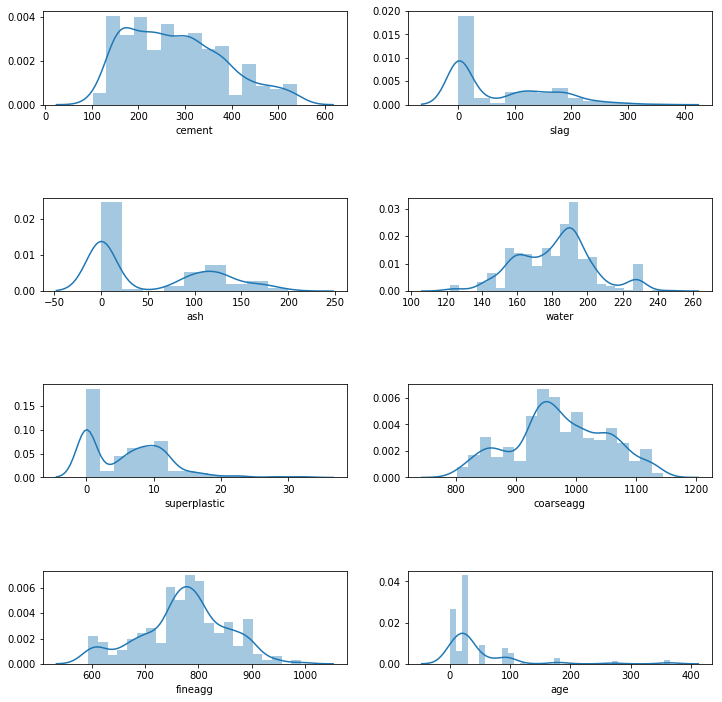

In [12]:
fig, axarr = plt.subplots(4, 2, figsize=(12, 12))

sns.distplot(data_df['cement'],ax=axarr[0][0])
sns.distplot(data_df['slag'],ax=axarr[0][1])
sns.distplot(data_df['ash'],ax=axarr[1][0])
sns.distplot(data_df['water'],ax=axarr[1][1])
sns.distplot(data_df['superplastic'],ax=axarr[2][0])
sns.distplot(data_df['coarseagg'],ax=axarr[2][1])
sns.distplot(data_df['fineagg'],ax=axarr[3][0])
sns.distplot(data_df['age'],ax=axarr[3][1])

plt.subplots_adjust(hspace=1)

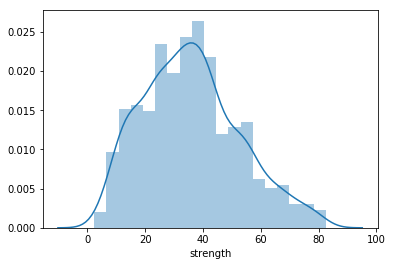

In [13]:
sns.distplot(data_df['strength'])

# Bi/Multi variate analysis

In [14]:
corr = data_df.corr(method='pearson')
corr

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplastic,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
coarseagg,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fineagg,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


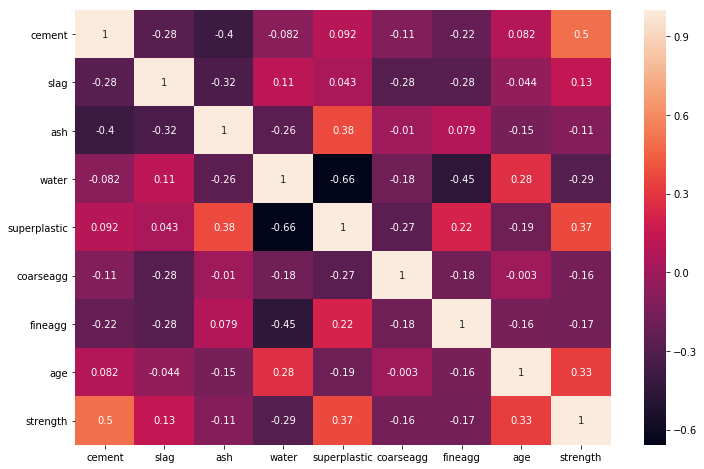

In [15]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True)

'cement' has the highest correlation with the 'strength'(which is a positive correlation), followed by 'superplastic', which is also a positive correlation, 'ash' has the least correlation

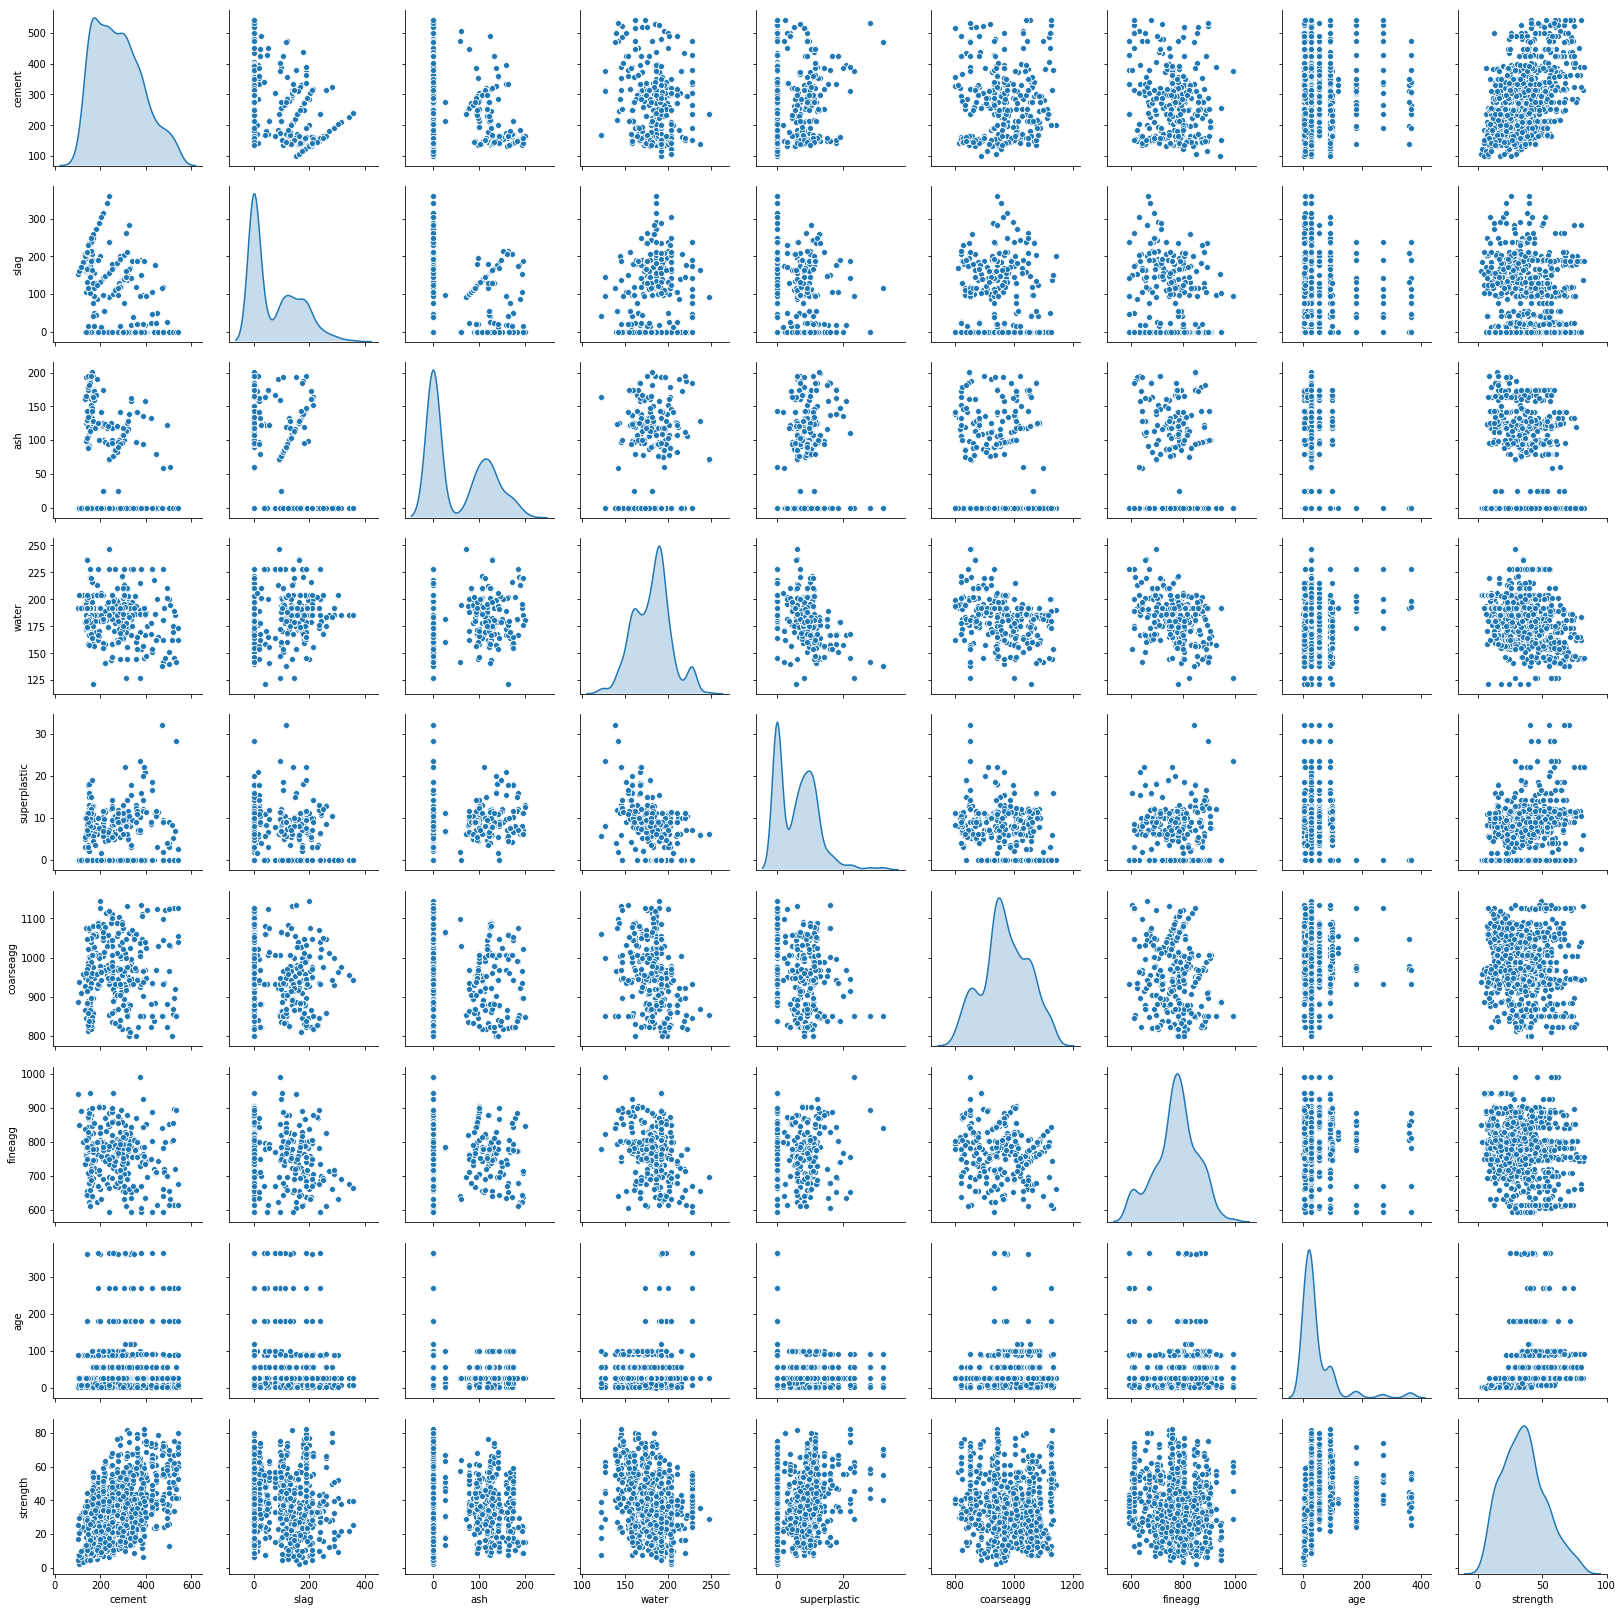

In [16]:
sns.pairplot(data_df,diag_kind='kde')

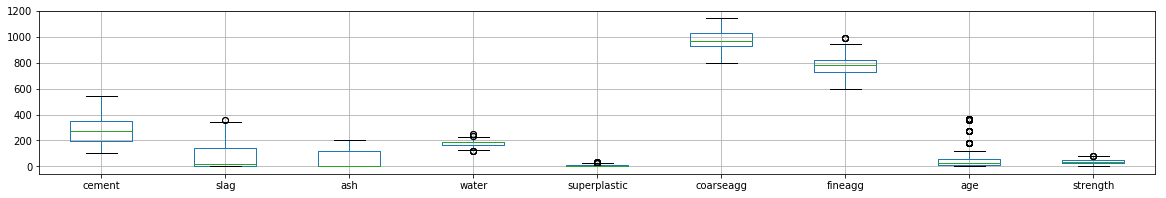

In [17]:
data_df.boxplot(figsize=(20,3))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024A574D6550>,
      dtype=object)

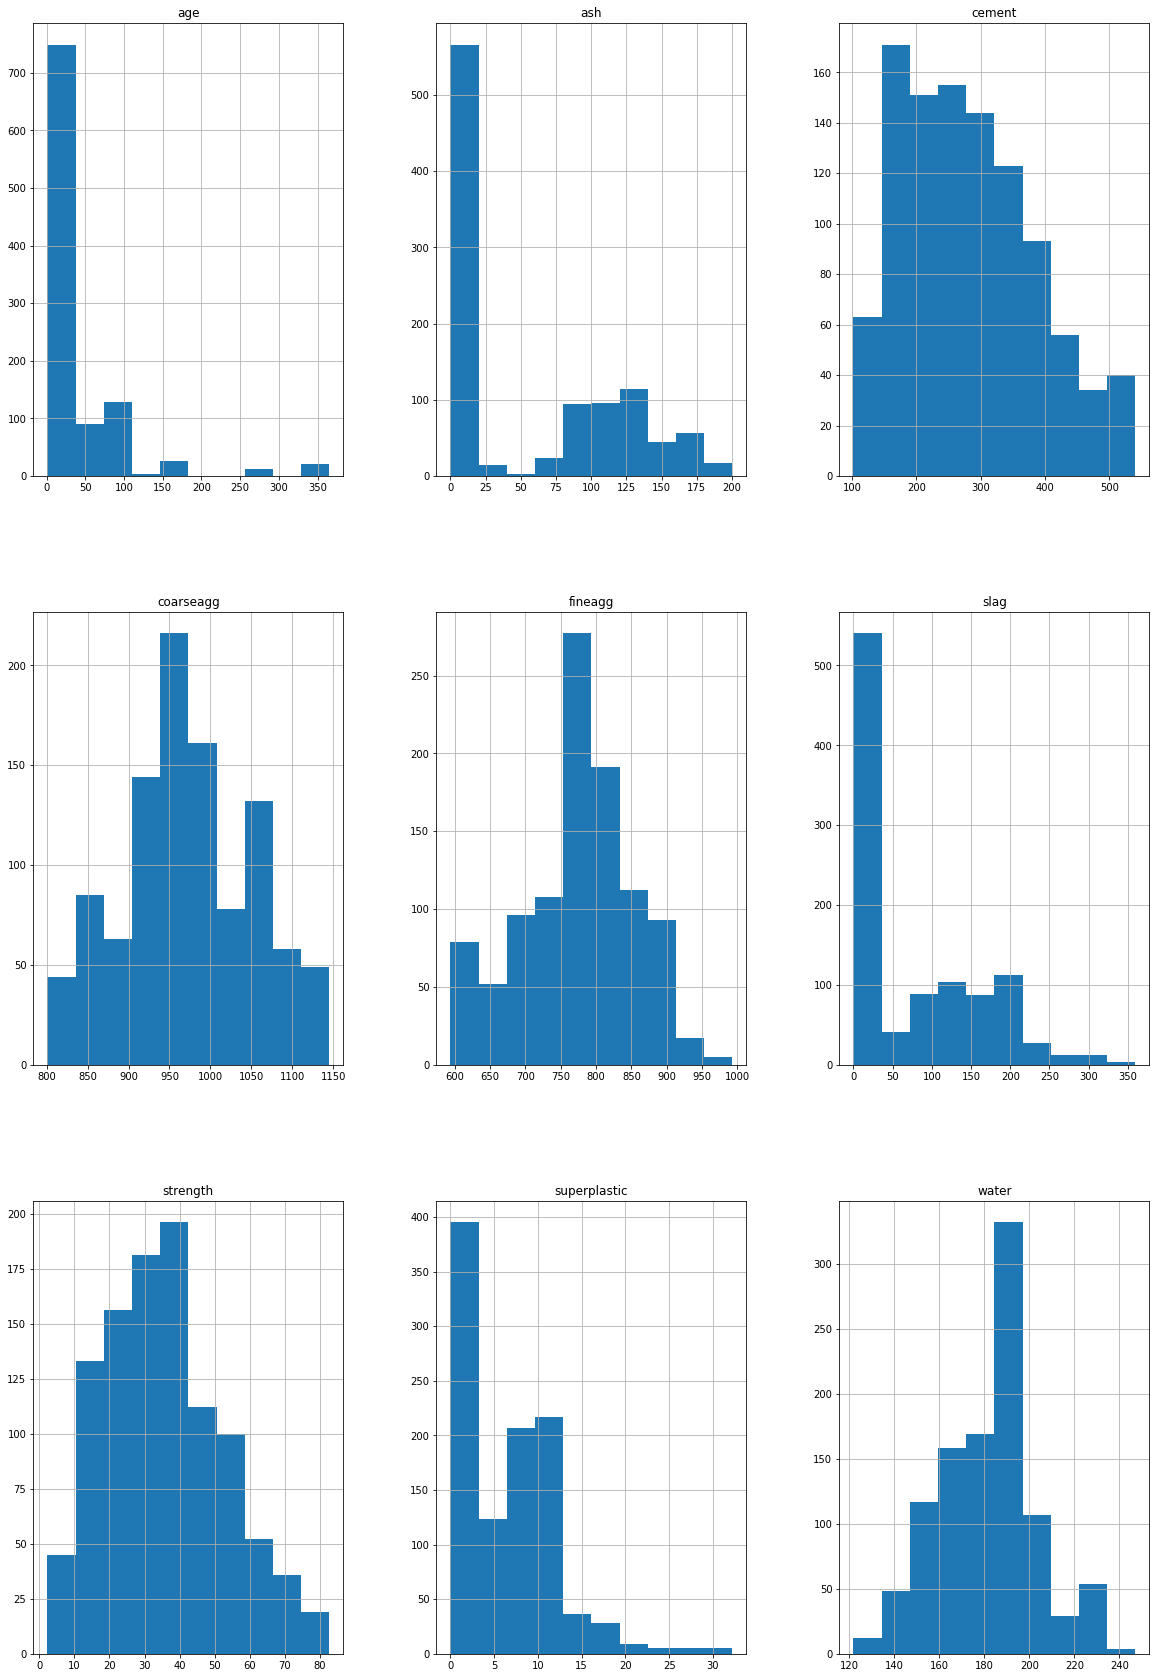

In [18]:
data_df.hist(figsize=(20,30))

Most of the dataset's samples fall between 34 and 42 of 'strength' continous output class, with a positive skew

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024A5836D198>,
      dtype=object)

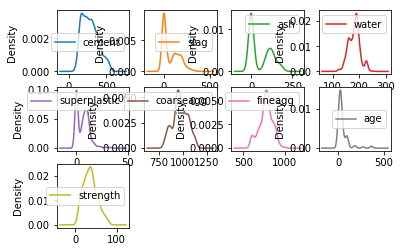

In [19]:
data_df.plot(kind='density', subplots=True, layout=(3,4), sharex=False, sharey=False)

None of the features have a Guassian Distribution. All of them have a positive skew except 'water' and 'fineagg', which have negative skews

c:\users\saikumaryava\appdata\local\programs\python\python36\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


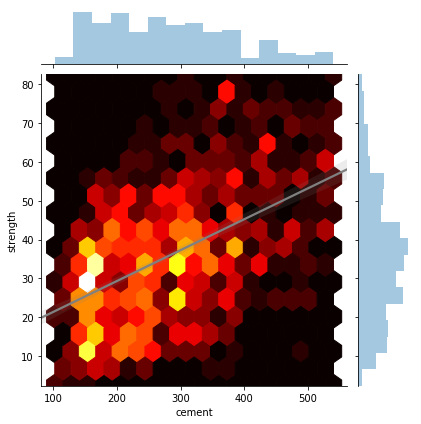

In [20]:
g = sns.jointplot(x = 'cement', 
              y = 'strength',
              data = data_df, 
              kind = 'hex', 
              cmap= 'hot', 
              size=6)

sns.regplot(data_df.cement, data_df.strength, ax=g.ax_joint, scatter=False, color='grey');

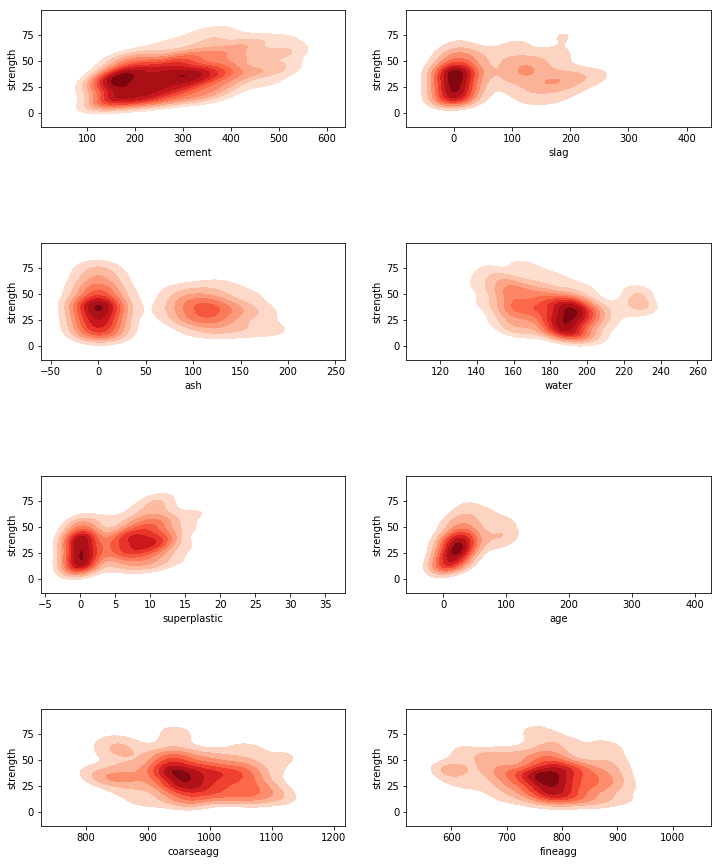

In [21]:
fig, axarr = plt.subplots(4, 2, figsize=(12, 15))
sns.kdeplot(data_df.cement, data_df.strength,
                 cmap="Reds", shade=True, shade_lowest=False,ax=axarr[0][0])
sns.kdeplot(data_df.slag, data_df.strength,
                 cmap="Reds", shade=True, shade_lowest=False,ax=axarr[0][1])
sns.kdeplot(data_df.ash, data_df.strength,
                 cmap="Reds", shade=True, shade_lowest=False,ax=axarr[1][0])
sns.kdeplot(data_df.water, data_df.strength,
                 cmap="Reds", shade=True, shade_lowest=False,ax=axarr[1][1])
sns.kdeplot(data_df.superplastic, data_df.strength,
                 cmap="Reds", shade=True, shade_lowest=False,ax=axarr[2][0])
sns.kdeplot(data_df.age, data_df.strength,
                 cmap="Reds", shade=True, shade_lowest=False,ax=axarr[2][1])
sns.kdeplot(data_df.coarseagg, data_df.strength,
                 cmap="Reds", shade=True, shade_lowest=False,ax=axarr[3][0])
sns.kdeplot(data_df.fineagg, data_df.strength,
                 cmap="Reds", shade=True, shade_lowest=False,ax=axarr[3][1])
plt.subplots_adjust(hspace=1)

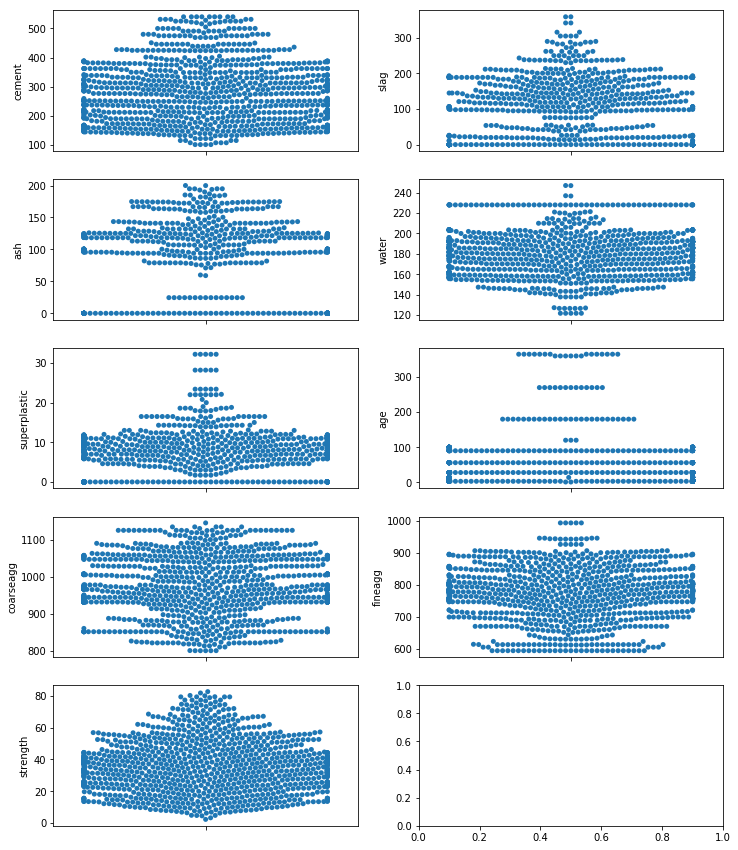

In [22]:
fig, axarr = plt.subplots(5, 2, figsize=(12, 15))
sns.swarmplot(y=data_df["cement"],ax=axarr[0][0])
sns.swarmplot(y=data_df["slag"],ax=axarr[0][1])
sns.swarmplot(y=data_df["ash"],ax=axarr[1][0])
sns.swarmplot(y=data_df["water"],ax=axarr[1][1])
sns.swarmplot(y=data_df["superplastic"],ax=axarr[2][0])
sns.swarmplot(y=data_df["age"],ax=axarr[2][1])
sns.swarmplot(y=data_df["coarseagg"],ax=axarr[3][0])
sns.swarmplot(y=data_df["fineagg"],ax=axarr[3][1])
sns.swarmplot(y=data_df["strength"],ax=axarr[4][0])

# Insights from the dataset

* 'cement' has the highest correlation with the 'strength'(which is a positive correlation), followed by
  'superplastic', which is also a positive correlation, 'ash' has the least correlation
* Most of the dataset's samples fall between 34 and 42 of 'strength' continous output class, with a positive skew
* None of the features have a Guassian Distribution. All of them have a positive skew except 'water' and 'fineagg',     which have negative skews
* This dataset does not have any missing values

# Feature Selection

In [23]:
dataset = data_df.values

X = dataset[:,0:8]
Y = dataset[:,8] 

In [24]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor()
rfe = RFE(model, 3)
fit = rfe.fit(X, Y)

print("Number of Features: ", fit.n_features_)
print("Selected Features: ", fit.support_)
print("Feature Ranking: ", fit.ranking_) 

Number of Features:  3
Selected Features:  [ True False False False  True False False  True]
Feature Ranking:  [1 2 5 3 1 6 4 1]


c:\users\saikumaryava\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\saikumaryava\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\saikumaryava\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\saikumaryava\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 

'cement', 'superplastic' and 'age' were top 3 selected features/feature combination for predicting 'Area' using Recursive Feature Elimination, the 1st and 2nd selected features were atually among the attributes with the highest correlation with the 'strength'

# Create The Model

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data_df[data_df.columns[:-1]],data_df[[data_df.columns[-1]]],test_size = .2,random_state = 1)

In [26]:
# Scaling the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(x_train)
x_train_scaled = pd.DataFrame(scaler.transform(x_train),
                              columns = x_train.columns)
x_train_scaled.head()

c:\users\saikumaryava\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\saikumaryava\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
0,1.038012,-0.838296,-0.883934,0.499298,-1.054123,-0.433488,-0.166207,-0.674794
1,0.753573,1.357353,-0.883934,-0.770854,0.879130,-0.372869,-0.193576,-0.287133
2,-0.654587,-0.838296,0.995414,-0.049070,-0.104162,1.083283,0.098772,-0.287133
3,1.954953,-0.536249,1.017051,0.921120,-0.404150,-1.955419,-0.900187,-0.674794
4,1.805248,0.541826,-0.883934,-0.011575,0.429149,-1.567198,0.126141,-0.674794


In [27]:
# We will save the model performance metrics in a DataFrame
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold, cross_val_score
import numpy as np
Model = []
RMSE = []
R_sq = []
cv = KFold(5, random_state = 1)

# Creating a Function to append the cross validation scores of the algorithms
def input_scores(name, model, x, y):
    Model.append(name)
    RMSE.append(np.sqrt((-1) * cross_val_score(model, x, y, cv=cv, 
                                               scoring='neg_mean_squared_error').mean()))
    R_sq.append(cross_val_score(model, x, y, cv=cv, scoring='r2').mean())

In [28]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor, 
                              AdaBoostRegressor)

names = ['Linear Regression', 'Ridge Regression', 'Lasso Regression',
         'K Neighbors Regressor', 'Decision Tree Regressor', 
         'Random Forest Regressor', 'Gradient Boosting Regressor',
         'Adaboost Regressor']
models = [LinearRegression(), Ridge(), Lasso(),
          KNeighborsRegressor(), DecisionTreeRegressor(),
          RandomForestRegressor(), GradientBoostingRegressor(), 
          AdaBoostRegressor()]

# Running all algorithms
for name, model in zip(names, models):
    input_scores(name, model, x_train_scaled, y_train.values.ravel())

c:\users\saikumaryava\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\saikumaryava\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\saikumaryava\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\saikumaryava\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 

In [29]:
evaluation = pd.DataFrame({'Model': Model,
                           'RMSE': RMSE,
                           'R Squared': R_sq})
print("FOLLOWING ARE THE TRAINING SCORES: ")
evaluation

FOLLOWING ARE THE TRAINING SCORES: 


,Model,RMSE,R Squared
0,Linear Regression,10.486209,0.599298
1,Ridge Regression,10.487354,0.599191
2,Lasso Regression,11.073431,0.553328
3,K Neighbors Regressor,9.335353,0.681681
4,Decision Tree Regressor,7.030680,0.816217
5,Random Forest Regressor,5.724621,0.887096
6,Gradient Boosting Regressor,5.306678,0.897045
7,Adaboost Regressor,7.805613,0.776520


Gradient Boosting Regressor has the lowest RMSE, highest R-Squared

In [30]:
# tuning this base model
GradientBoostingRegressor()

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [31]:
# tuning for number of trees
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators':range(20,1001,10),
              'max_depth':[10], #range(5,16,2), 
              'min_samples_split':[100], #range(200,1001,200), 
              'learning_rate':[0.2]}
clf = GridSearchCV(GradientBoostingRegressor(random_state=1), 
                   param_grid = param_grid, scoring='r2', 
                   cv=cv).fit(x_train_scaled, y_train.values.ravel())
print(clf.best_estimator_) 
print("R Squared:",clf.best_score_)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.2, loss='ls', max_depth=10, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=100, min_weight_fraction_leaf=0.0,
             n_estimators=210, n_iter_no_change=None, presort='auto',
             random_state=1, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)
R Squared: 0.9285604583876466


# Tuning The Model

In [32]:
# tuning the tree specific parameters
param_grid = {'n_estimators': [230],
              'max_depth': range(10,31,2), 
              'min_samples_split': range(50,501,10), 
              'learning_rate':[0.2]}
clf = GridSearchCV(GradientBoostingRegressor(random_state=1), 
                   param_grid = param_grid, scoring='r2', 
                   cv=cv).fit(x_train_scaled, y_train.values.ravel())
print(clf.best_estimator_) 
print("R Squared:",clf.best_score_)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.2, loss='ls', max_depth=18, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=190, min_weight_fraction_leaf=0.0,
             n_estimators=230, n_iter_no_change=None, presort='auto',
             random_state=1, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)
R Squared: 0.9348209717808229


In [33]:
# now increasing number of trees and decreasing learning rate proportionally
clf = GradientBoostingRegressor(random_state=1, max_depth=20, 
                                min_samples_split=170, n_estimators=230*2, 
                                learning_rate=0.2/2)
print("R Squared:",cross_val_score(clf, x_train_scaled, y_train.values.ravel(), cv=cv, scoring='r2').mean())

R Squared: 0.9342629476416034


Since score improved, the best model is GradientBoostingRegressor with learning_rate= 0.2/2, max_depth= 20, min_samples_split= 170, n_estimators= 230*2

In [34]:
# applying this model on test data
x_test_scaled = pd.DataFrame(scaler.transform(x_test),
                             columns = x_test.columns)
clf = GradientBoostingRegressor(learning_rate=0.2/2, max_depth=20,
                                min_samples_split=170, n_estimators=230*2, 
                                random_state=1).fit(x_train_scaled, y_train.values.ravel())
print("Test RMSE: ", np.sqrt(mean_squared_error(y_test.values.ravel(), clf.predict(x_test_scaled))))
print("Test R^2: ", r2_score(y_test.values.ravel(), clf.predict(x_test_scaled)))

c:\users\saikumaryava\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


Test RMSE:  3.872513358165905
Test R^2:  0.9490732519784533


# Lets visualization models performance

In [35]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

target = "strength"
def model(algorithm,dtrainx,dtrainy,dtestx,dtesty,of_type):
    
    print (algorithm)
    print ("***************************************************************************")
    algorithm.fit(dtrainx,dtrainy)
    prediction = algorithm.predict(dtestx)
    print ("ROOT MEAN SQUARED ERROR :", np.sqrt(mean_squared_error(dtesty,prediction)) )
    print ("***************************************************************************")
    prediction = pd.DataFrame(prediction)
    cross_val = cross_val_score(algorithm,dtrainx,dtrainy,cv=20,scoring="neg_mean_squared_error")
    cross_val = cross_val.ravel()
    print ("CROSS VALIDATION SCORE")
    print ("************************")
    print ("cv-mean :",cross_val.mean())
    print ("cv-std  :",cross_val.std())
    print ("cv-max  :",cross_val.max())
    print ("cv-min  :",cross_val.min())
    
    plt.figure(figsize=(13,28))
    plt.subplot(211)
    
    testy = dtesty.reset_index()["strength"]
    
    ax = testy.plot(label="originals",figsize=(12,13),linewidth=2)
    ax = prediction[0].plot(label = "predictions",figsize=(12,13),linewidth=2)
    plt.legend(loc="best")
    plt.title("ORIGINALS VS PREDICTIONS")
    plt.xlabel("index")
    plt.ylabel("values")
    ax.set_facecolor("k")
    
    plt.subplot(212)
    
    if of_type == "coef":
        coef = pd.DataFrame(algorithm.coef_.ravel())
        coef["feat"] = dtrainx.columns
        ax1 = sns.barplot(coef["feat"],coef[0],palette="jet_r",
                          linewidth=2,edgecolor="k"*coef["feat"].nunique())
        ax1.set_facecolor("lightgrey")
        ax1.axhline(0,color="k",linewidth=2)
        plt.ylabel("coefficients")
        plt.xlabel("features")
        plt.title('FEATURE IMPORTANCES')
    
    elif of_type == "feat":
        coef = pd.DataFrame(algorithm.feature_importances_)
        coef["feat"] = dtrainx.columns
        ax2 = sns.barplot(coef["feat"],coef[0],palette="jet_r",
                          linewidth=2,edgecolor="k"*coef["feat"].nunique())
        ax2.set_facecolor("lightgrey")
        ax2.axhline(0,color="k",linewidth=2)
        plt.ylabel("coefficients")
        plt.xlabel("features")
        plt.title('FEATURE IMPORTANCES')

import warnings
warnings.filterwarnings("ignore")

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
***************************************************************************
ROOT MEAN SQUARED ERROR : 5.139800755458704
***************************************************************************
CROSS VALIDATION SCORE
************************
cv-mean : -29.72947338983701
cv-std  : 11.163727042154534
cv-max  : -15.082496440794202
cv-min  : -62.842356794207305


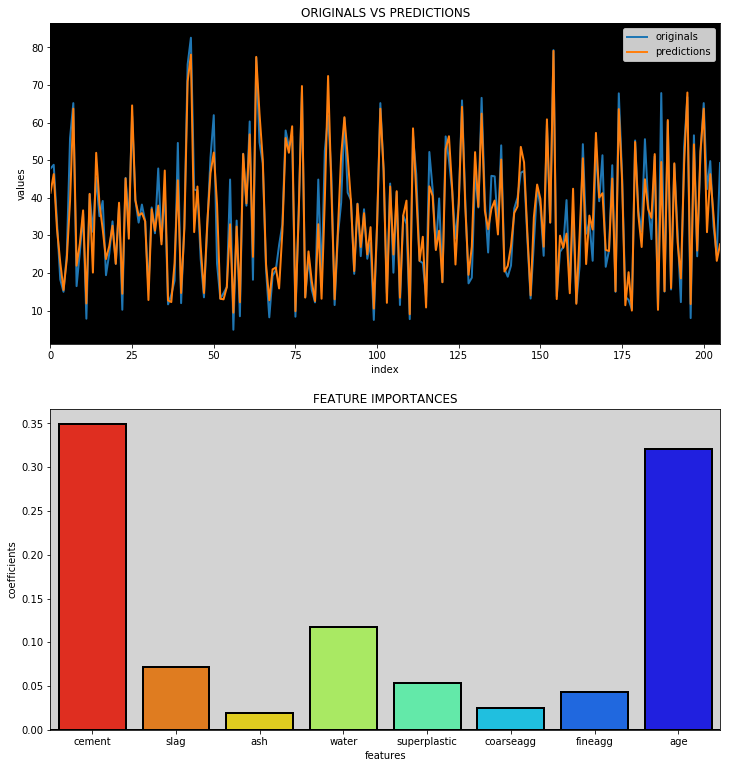

In [36]:
# RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
model(rf,x_train_scaled,y_train,x_test_scaled,y_test,"feat")

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)
***************************************************************************
ROOT MEAN SQUARED ERROR : 5.119444820257288
***************************************************************************
CROSS VALIDATION SCORE
************************
cv-mean : -28.028057715639676
cv-std  : 8.862363409797743
cv-max  : -14.245204099157462
cv-min  : -47.29788785130147


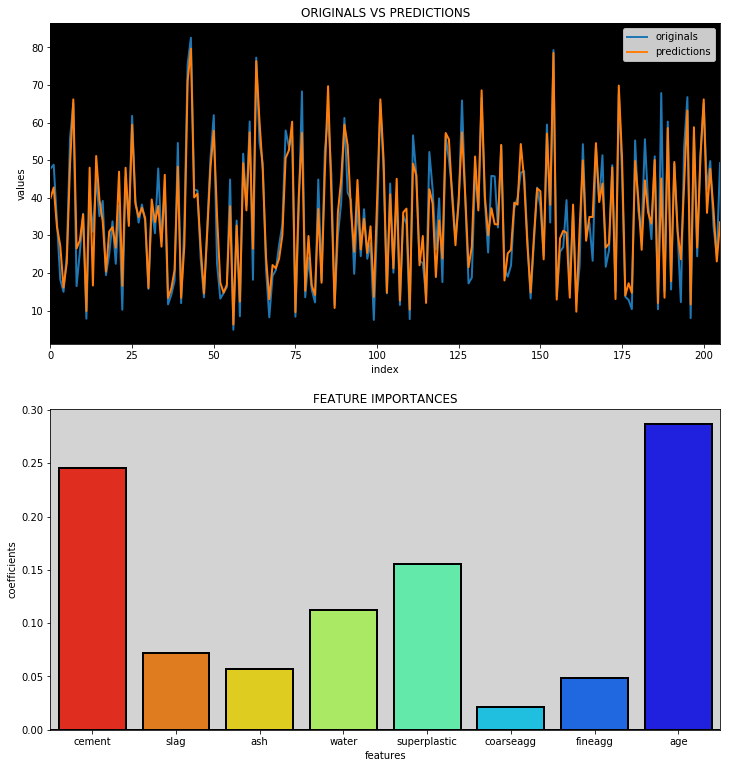

In [37]:
# XGBRegressor
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
xgr =XGBRegressor()
model(xgr,x_train_scaled,y_train,x_test_scaled,y_test,"feat")

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
          oob_score=False, random_state=None, verbose=0, warm_start=False)
***************************************************************************
ROOT MEAN SQUARED ERROR : 5.332901324989166
***************************************************************************
CROSS VALIDATION SCORE
************************
cv-mean : -25.613287218219284
cv-std  : 9.286495841844006
cv-max  : -11.418025829268293
cv-min  : -51.97521282926828


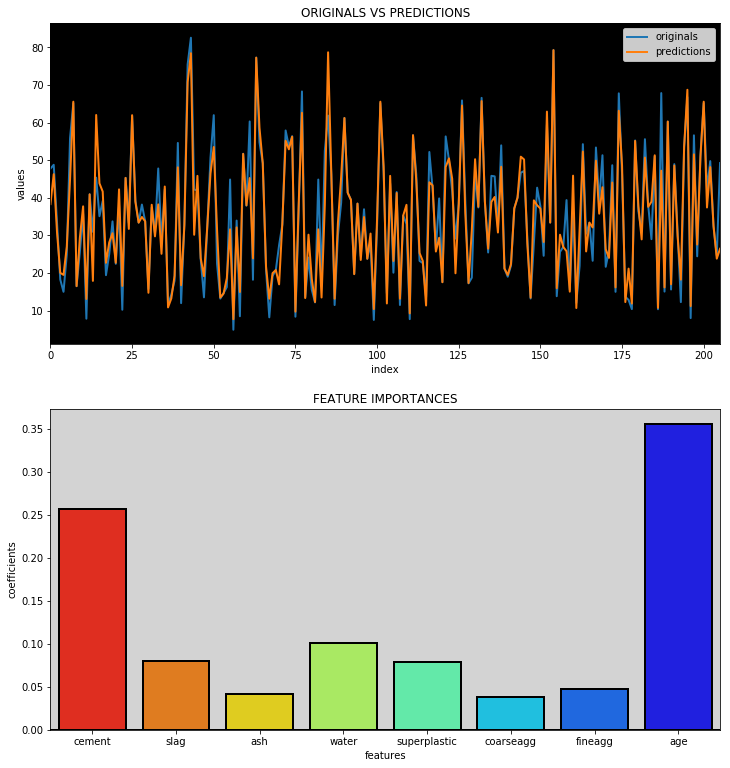

In [38]:
# ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor
etr = ExtraTreesRegressor()
model(etr,x_train_scaled,y_train,x_test_scaled,y_test,"feat")

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=50, random_state=None)
***************************************************************************
ROOT MEAN SQUARED ERROR : 7.853312156890701
***************************************************************************
CROSS VALIDATION SCORE
************************
cv-mean : -58.697375452622694
cv-std  : 12.401767351101691
cv-max  : -42.804133434588046
cv-min  : -92.2155913678673


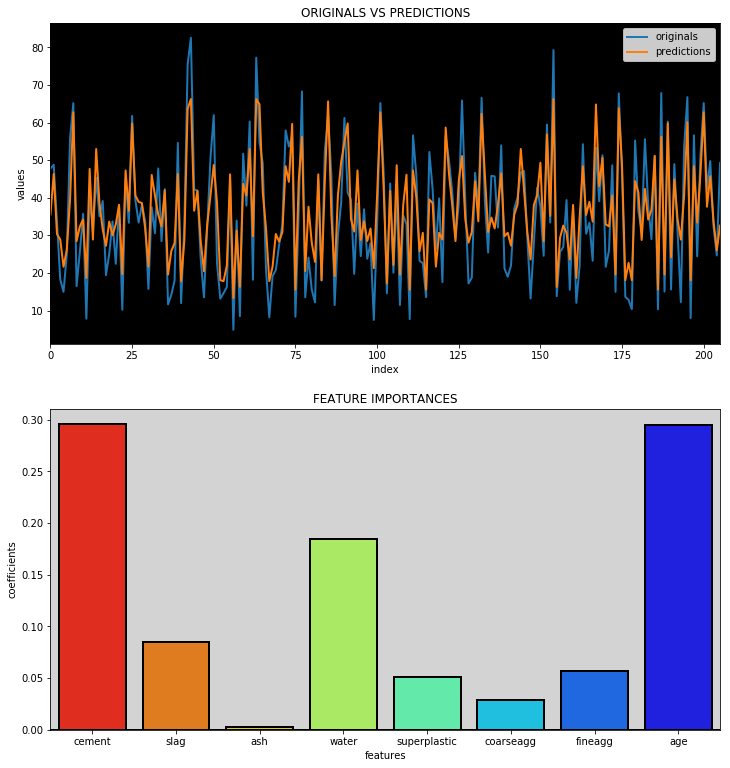

In [39]:
# AdaBoostRegressor
from sklearn.ensemble import AdaBoostRegressor
adb = AdaBoostRegressor()
model(adb,x_train_scaled,y_train,x_test_scaled,y_test,"feat")

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
***************************************************************************
ROOT MEAN SQUARED ERROR : 10.415321631187357
***************************************************************************
CROSS VALIDATION SCORE
************************
cv-mean : -110.4338985428629
cv-std  : 26.348204321355258
cv-max  : -65.19729843523581
cv-min  : -162.71737318943633


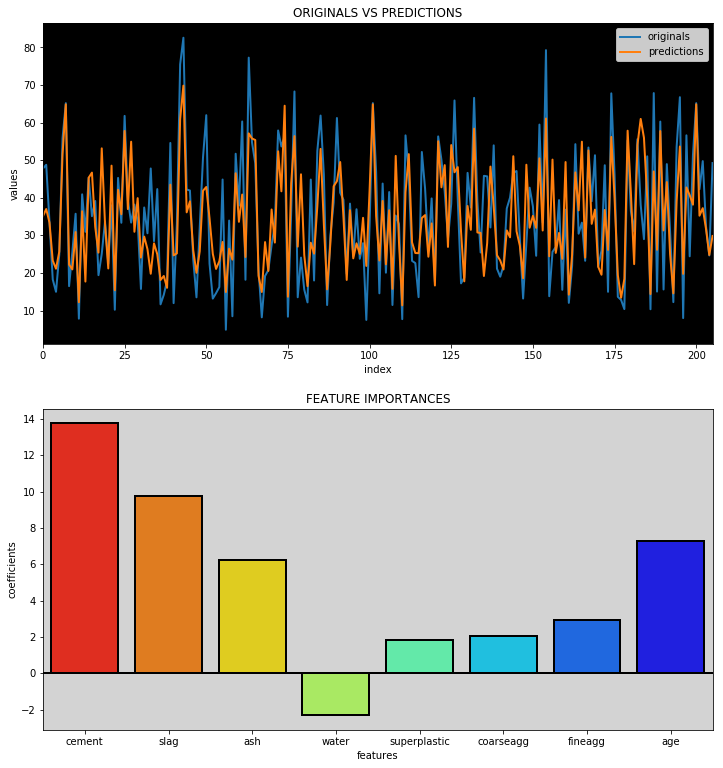

In [40]:
# LinearRegression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model(lr,x_train_scaled,y_train,x_test_scaled,y_test,"coef")